## Purpose:
Make charts comparing movement of food prices to DJIA

In [33]:
%matplotlib inline

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Compare beef to DJIA

In [3]:
beef_df = pd.read_csv("../Edited Data/Output/FRED_beef_cleaned.csv")
djia_df = pd.read_csv("../Edited Data/Output/cleaned_djia.csv")

In [4]:
beef_df.head()

,date_time,Beef $/LB,Beef_Pct_Change
0,1990-01-01,1.557,NaN
1,1990-02-01,1.572,0.009634
2,1990-03-01,1.571,-0.000636
3,1990-04-01,1.593,0.014004
4,1990-05-01,1.577,-0.010044


In [5]:
djia_df.head()

,date_time,DJIA_Price,DJIA_Open,DJIA_High,DJIA_Low,DJIA_Volume,DJIA_Change_Percent
0,2023-03-01,32930.14,32656.37,32973.59,32500.84,NaN,0.84
1,2023-02-01,32654.98,34039.60,34333.87,32638.35,NaN,-4.20
2,2023-01-01,34086.89,33225.61,34342.28,32812.33,NaN,2.83
3,2022-12-01,33147.28,34533.59,34711.63,32573.43,NaN,-4.16
4,2022-11-01,34587.46,32927.61,34587.46,31728.85,NaN,5.66


In [6]:
djia_df_asc = djia_df.sort_values("date_time")
djia_df_asc.head()

,date_time,DJIA_Price,DJIA_Open,DJIA_High,DJIA_Low,DJIA_Volume,DJIA_Change_Percent
458,1990-01-01,2590.54,2753.41,2822.95,2519.14,474840000.0,-5.91
457,1990-01-02,2590.54,2748.72,2834.04,2513.06,22610000.0,0.00
456,1990-02-01,2627.25,2590.32,2664.86,2548.42,354110000.0,1.42
455,1990-03-01,2707.21,2627.70,2768.24,2618.47,428160000.0,3.04
454,1990-04-01,2656.76,2706.76,2782.88,2634.01,422220000.0,-1.86


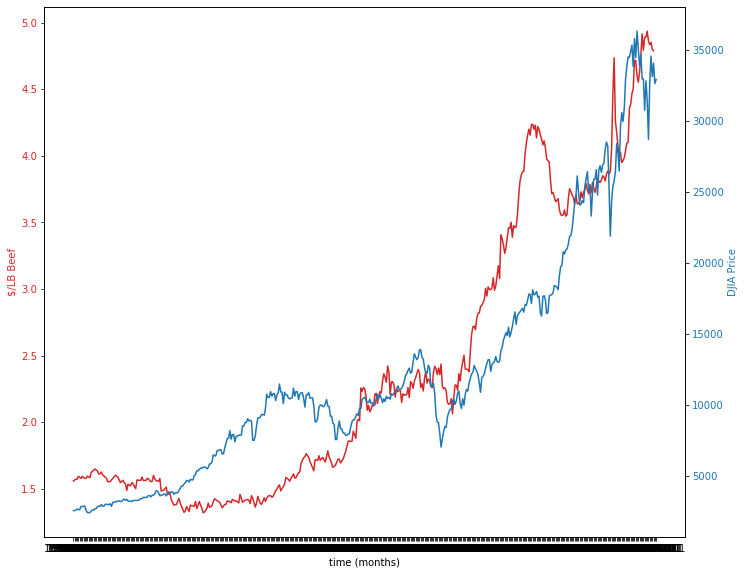

In [7]:
# Adapted from documentation
# https://matplotlib.org/stable/gallery/subplots_axes_and_figures/two_scales.html

t = beef_df["date_time"].values

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (months)')
ax1.set_ylabel('$/LB Beef', color=color)
ax1.plot(t, beef_df["Beef $/LB"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("DJIA Price", color=color)  # we already handled the x-label with ax1
ax2.plot(djia_df_asc["date_time"].values, djia_df_asc["DJIA_Price"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(12, 9)
plt.show()

In [8]:
# Create dataframe combining all prices 

In [9]:
# import combined chart from ML prep
combined_df = pd.read_csv("../Edited Data/Output/all_price_data_withdatetime.csv")
combined_df.head()

,date_time,Beef $/LB,Beef_Pct_Change,Wheat_Price,CPI_Price,Milk Cost per Gallon,DJIA_change
0,1995-07-01,1.365,0.024006,1.147,138.2,2.477,1
1,1995-08-01,1.328,-0.027106,1.161,138.8,2.482,0
2,1995-09-01,1.376,0.036145,1.159,139.5,2.459,1
3,1995-10-01,1.371,-0.003634,1.175,140.6,2.473,0
4,1995-11-01,1.368,-0.002188,1.169,141.0,2.493,1


In [10]:
combined_df = combined_df.merge(djia_df_asc, on="date_time")
combined_df.head()

,date_time,Beef $/LB,Beef_Pct_Change,Wheat_Price,CPI_Price,Milk Cost per Gallon,DJIA_change,DJIA_Price,DJIA_Open,DJIA_High,DJIA_Low,DJIA_Volume,DJIA_Change_Percent
0,1995-07-01,1.365,0.024006,1.147,138.2,2.477,1,4708.47,4552.98,4747.21,4551.25,665570000.0,3.34
1,1995-08-01,1.328,-0.027106,1.161,138.8,2.482,0,4610.56,4711.28,4754.96,4570.85,623010000.0,-2.08
2,1995-09-01,1.376,0.036145,1.159,139.5,2.459,1,4789.08,4610.20,4816.54,4607.03,702700000.0,3.87
3,1995-10-01,1.371,-0.003634,1.175,140.6,2.473,0,4755.48,4786.55,4816.90,4659.74,685560000.0,-0.70
4,1995-11-01,1.368,-0.002188,1.169,141.0,2.493,1,5074.49,4749.34,5118.93,4744.64,598970000.0,6.71


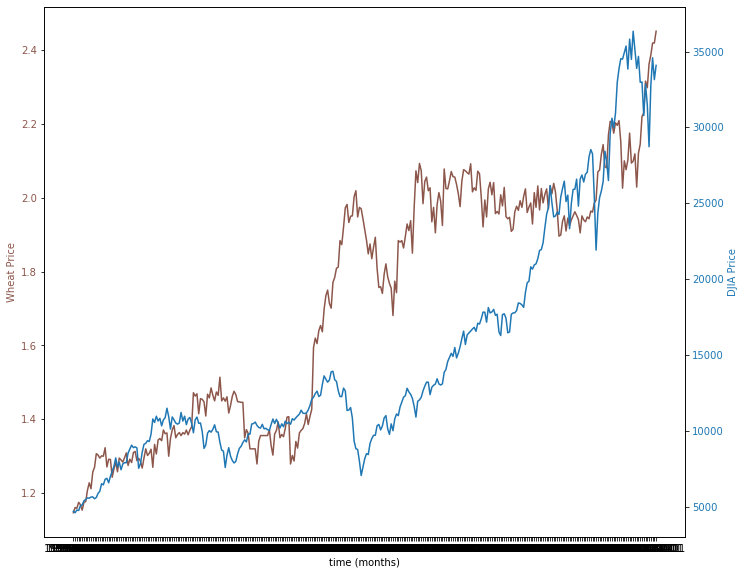

In [12]:
# Create chart comparing wheat prices to DJIA price

t = combined_df["date_time"].values

fig, ax1 = plt.subplots()

color = 'tab:brown'
ax1.set_xlabel('time (months)')
ax1.set_ylabel('Wheat Price', color=color)
ax1.plot(t, combined_df["Wheat_Price"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("DJIA Price", color=color)  # we already handled the x-label with ax1
ax2.plot(t, combined_df["DJIA_Price"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(12, 9)
plt.show()

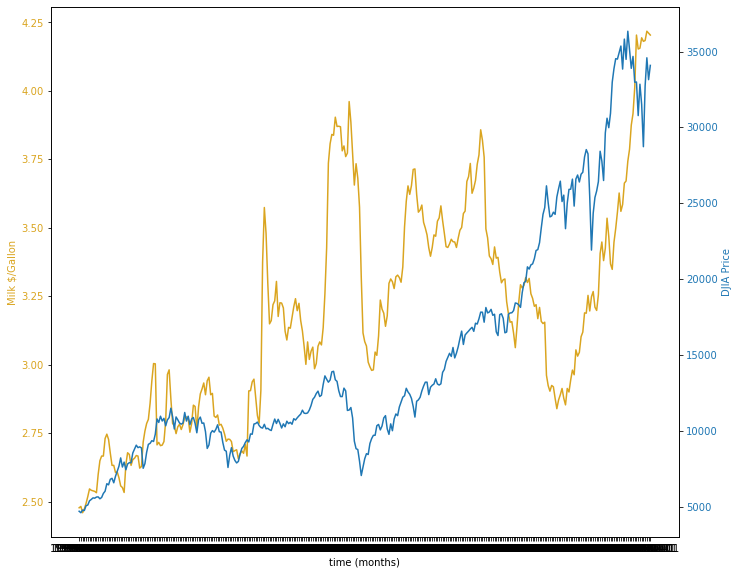

In [17]:
# Make chart comparing milk to DJIA
t = combined_df["date_time"].values

fig, ax1 = plt.subplots()

color = 'goldenrod'
ax1.set_xlabel('time (months)')
ax1.set_ylabel('Milk $/Gallon', color=color)
ax1.plot(t, combined_df["Milk Cost per Gallon"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("DJIA Price", color=color)  # we already handled the x-label with ax1
ax2.plot(t, combined_df["DJIA_Price"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(12, 9)
plt.show()

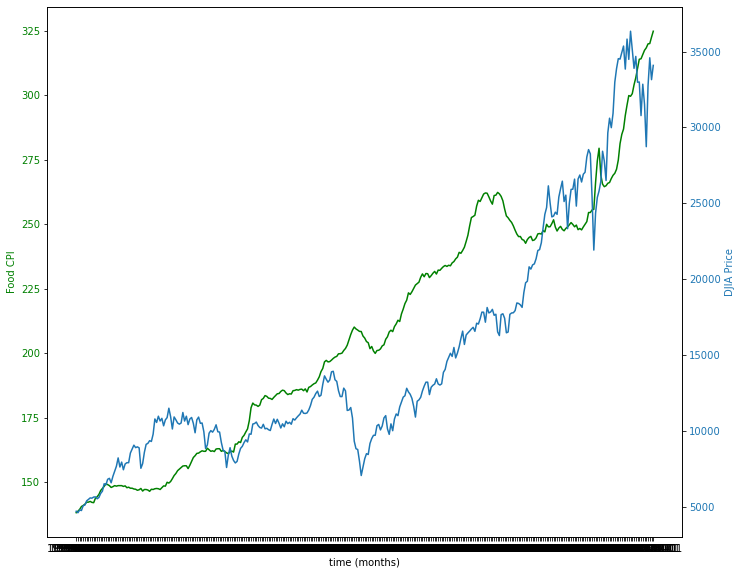

In [18]:
# Compare food cpi to DJIA
t = combined_df["date_time"].values

fig, ax1 = plt.subplots()

color = 'green'
ax1.set_xlabel('time (months)')
ax1.set_ylabel('Food CPI', color=color)
ax1.plot(t, combined_df["CPI_Price"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel("DJIA Price", color=color)  # we already handled the x-label with ax1
ax2.plot(t, combined_df["DJIA_Price"], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(12, 9)
plt.show()

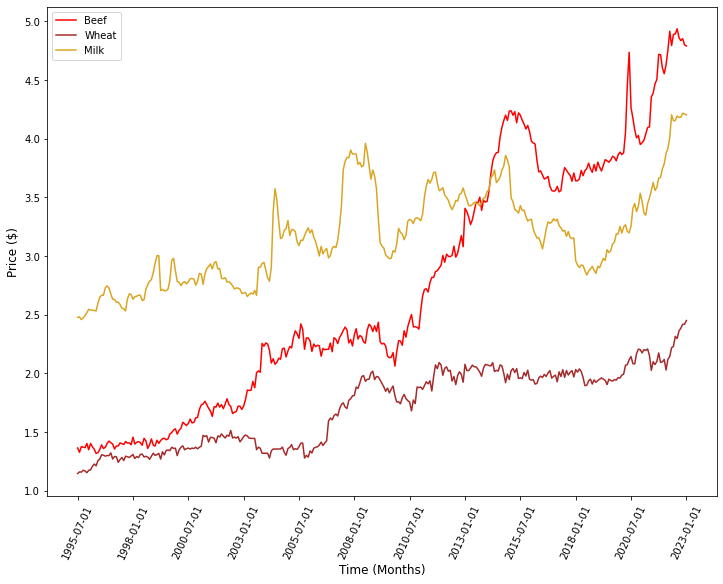

In [51]:
# Compare individual foot category prices
# Define values
beef = combined_df["Beef $/LB"].values
wheat = combined_df["Wheat_Price"].values
milk = combined_df["Milk Cost per Gallon"]

# Create chart
plt.subplots(figsize=(12, 9))
plt.plot(t, beef, color='red', label='Beef')
plt.plot(t, wheat, color='brown', label='Wheat')
plt.plot(t, milk, color='goldenrod', label='Milk')

# X-ticks
# Create x-tick values
xticks = []
months = list(combined_df["date_time"].values)

for i in range(0, len(months), 30):
    xticks.append(months[i])

plt.xticks(ticks=xticks, rotation=65)

# Format
plt.xlabel("Time (Months)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)

plt.legend()
plt.show()

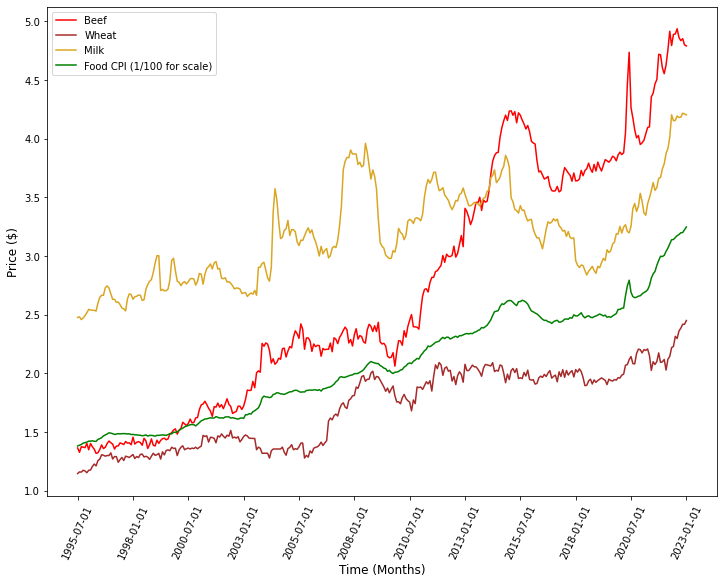

In [54]:
# Add cpi to above chart

# Define values
cpi = combined_df["CPI_Price"].values

# Create chart
plt.subplots(figsize=(12, 9))
plt.plot(t, beef, color='red', label='Beef')
plt.plot(t, wheat, color='brown', label='Wheat')
plt.plot(t, milk, color='goldenrod', label='Milk')
plt.plot(t, cpi/100, color='green', label='Food CPI (1/100 for scale)')

plt.xticks(ticks=xticks, rotation=65)

# Format
plt.xlabel("Time (Months)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)

plt.legend()
plt.show()

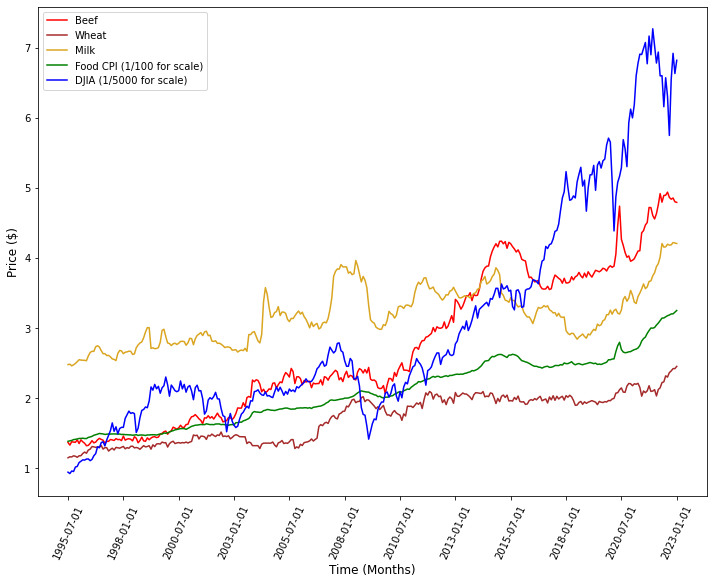

In [56]:
# Add DJIA to above chart

# Define values
djia = combined_df["DJIA_Price"].values

# Create chart
plt.subplots(figsize=(12, 9))
plt.plot(t, beef, color='red', label='Beef')
plt.plot(t, wheat, color='brown', label='Wheat')
plt.plot(t, milk, color='goldenrod', label='Milk')
plt.plot(t, cpi/100, color='green', label='Food CPI (1/100 for scale)')
plt.plot(t, djia/5000, color='blue', label='DJIA (1/5000 for scale)')

plt.xticks(ticks=xticks, rotation=65)

# Format
plt.xlabel("Time (Months)", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)

plt.legend()
plt.show()